# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID:   28
TEAM-NAME:   lilly
YOUR-ID:   2018102016
YOUR-NAME:   mohit pavan kumar Gadamsetty

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [3]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 1      | sample 1      | sample 1|sample 1|

### Answer for 1.2
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 2      | sample 2      | sample 2|sample 2|



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [4]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():
  
    # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
    # add noise
    P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
    # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1
  
    # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
    # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)
  
    return X, P1, P2

In [5]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
def rsm(X,P):
    sum1=0;
    for i in range(2):
        for j in range(len(X)):
            sum1+=((X[i][j]-P[i][j])**2)
    sum1/=len(X)
    sum1**=0.5
    return sum1
X,P1,P2=generate_data()
#print(X[1])
#print(X[0])
#plt.plot(P1.T)

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0=P#Initialization(P0 is constant unchanging)
    for i in range(num_iter):
        # implementing ICP:
       # plot_icp(X,P,P0,i,rsme)
        # TODO2.1: what's current error?
        print("cur error :",end="")
        print(rsm(X,P))
        plot_icp(X,P,P0,i,rsm(X,P))
        
        # TODO2.2: call visualization helper function plot_icp.
        # TODO2.3: Implement ICP to get R, t
        XX=np.copy(X)
        PP=np.copy(P)
        for j in range(2):
            meanxx=np.sum(X[j])/len(X[j])
            meanxy=np.sum(P[j])/len(P[j])
            #print(meanxx,meanxy)
            for k in range(len(X[0])):
                XX[j][k]=XX[j][k]-meanxx
                PP[j][k]=PP[j][k]-meanxy
        me=np.dot(XX,PP.T)
        #print(me)
        u, s, vh = np.linalg.svd(me, full_matrices=True)
        R=np.dot(u,vh)
        mean_p=[[np.sum(P[0])/len(P[0])],[np.sum(P[1])/len(P[1])]]
        mean_x=[[np.sum(X[0])/len(X[0])],[np.sum(X[1])/len(X[1])]]
        t=mean_x- np.dot(R,mean_p) 
        #print(t)
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

cur error :1.4351915312176062


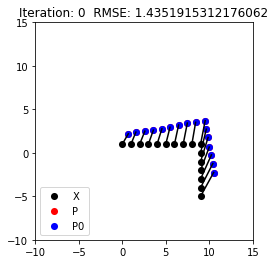

cur error :0.11476535236473068


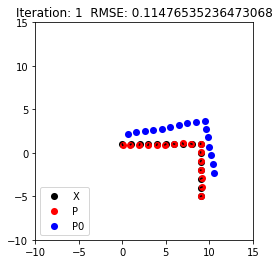

cur error :0.11476535236473115


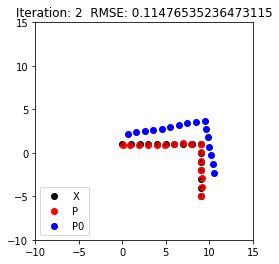

cur error :0.11476535236473016


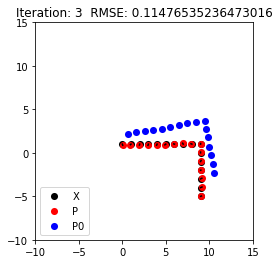

cur error :0.11476535236473141


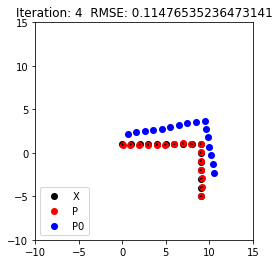

cur error :3.063624621296557


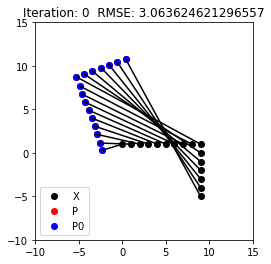

cur error :0.11476535236473123


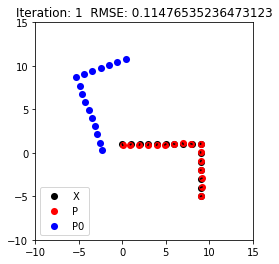

cur error :0.11476535236473082


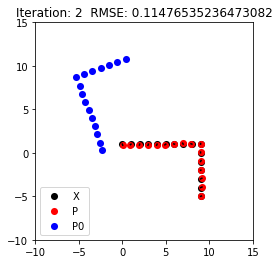

cur error :0.11476535236473079


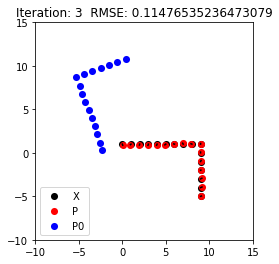

cur error :0.11476535236473132


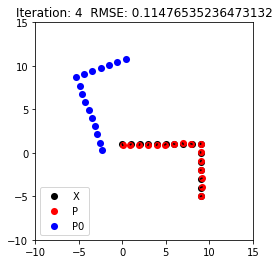

In [6]:
# Call ICP on P1 & P2

ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this

In [7]:
#the errors are some what random fluctuating from [0.1,0.2] because the noise is also random